In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [33]:
import plotly.express as px

In [34]:

data = pd.read_csv("C:\\Users\\91882\\\\Downloads\\InsuranceData.csv")

In [37]:
data.head()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# the distribution of insurance claims by age

In [38]:
fig = px.bar(data, x="age", y="claim", text="claim")
fig.show()

# distribution of insurance claims by gender

In [39]:
fig = px.bar(data, x="gender", y="claim", text="claim")
fig.show()

# distribution of insurance claims by bmi

In [40]:
fig = px.bar(data, x="bmi", y="claim", text="claim", color="smoker")
fig.show()


In [41]:
fig = px.bar(data, x="bmi", y="claim", text="claim", color="region", color_discrete_sequence = px.colors.sequential.Plasma)
fig.show()


# distribution of insurance claims by bloodpressure

In [42]:
fig = px.bar(data, x="bloodpressure", y="claim", text="claim", color="diabetic", color_discrete_sequence = px.colors.sequential.Jet)
fig.show()

# distribution of insurance claims by diabetic

In [43]:
fig = px.bar(data, x="diabetic", y="claim", text="claim")
fig.show()

# distribution of insurance claims by number of children

In [44]:
fig = px.bar(data, x="children", y="claim", text="claim")
fig.show()




# distribution of insurance claims by smoker

In [45]:
fig = px.bar(data, x="smoker", y="claim", text="claim")
fig.show()

#  distribution of insurance claims by region

In [46]:
fig = px.bar(data, x="region", y="claim", text="claim")
fig.show()

# the distribution of insurance claim amounts by region

In [48]:
fig = px.box(data, x="region", y="claim")
fig.show()

# the distribution of insurance claim amounts by diabetic status

In [49]:
fig = px.box(data, x="diabetic", y="claim")
fig.show()

# distribution of insurance claim amounts by smoking status

In [50]:
fig = px.box(data, x="smoker", y="claim")
fig.show()

# distribution of insurance claim amounts by number of children

In [51]:
fig = px.box(data, x="children", y="claim")
fig.show()

#  violin plot showing the distribution of insurance claim amounts by age and gender

In [52]:
fig = px.violin(data, y="claim", x="age", box=True, points='all',hover_data=data.columns)
fig.show()

In [53]:
fig = px.scatter(data, x="age", y="claim", color="gender", marginal_x="histogram", marginal_y="histogram", hover_data=data.columns)
fig.show()


In [54]:
import plotly.graph_objects as go

# the trends of insurance claims over time

In [55]:
age_group = data.groupby('age').sum()
fig = go.Figure(data=go.Scatter(x=age_group.index, y=age_group['claim'],mode='lines+markers'))
fig.update_layout(title='Claims over time',xaxis_title='Age',yaxis_title='Claims')
fig.show()

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [57]:
data.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [58]:
#correlation matrix
corr = data.corr()

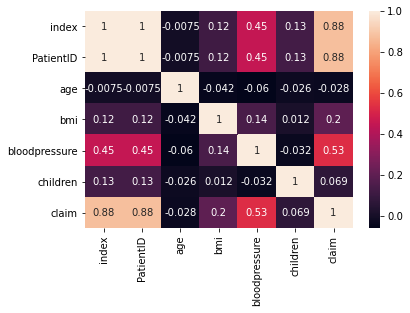

In [59]:
#heatmap of the correlation matrix
sns.heatmap(corr, annot=True)
plt.show()

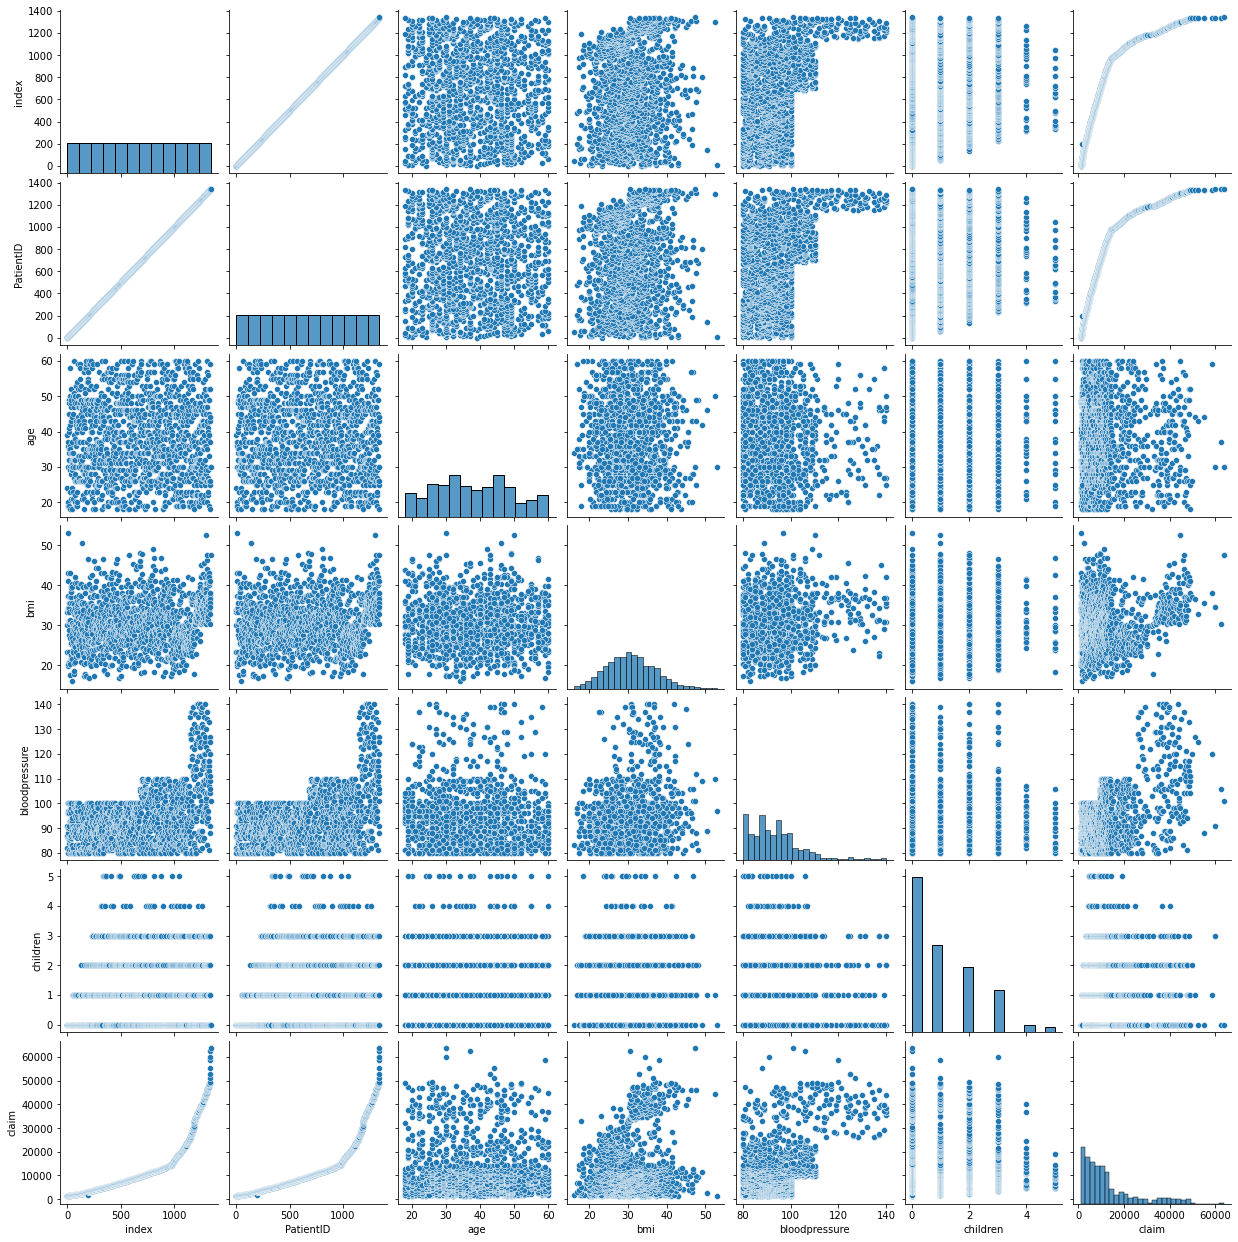

In [60]:
#pairplot function to generate scatter plots for the variables
sns.pairplot(data)
plt.show()

In [61]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler  #numerical
from scipy import stats

In [62]:
def advanced_preprocess_numeric_columns(df, method='median'):
    # copy of the DataFrame to avoid modifying the original data
    df = df.copy()
    
    # Get a list of all numeric columns
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Loop through each numeric column
    for col in numeric_columns:
        # Check if the column has missing values or outliers
        if df[col].isnull().any() or df[col].between(df[col].quantile(.01), df[col].quantile(.99)).all():
            # Fill missing values using SimpleImputer
            imputer = SimpleImputer(strategy=method)
            df[col] = imputer.fit_transform(df[col].values.reshape(-1, 1))

            # Scale the data using StandardScaler
            scaler = StandardScaler()
            df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

            # Remove outliers using the Z-score
            z_scores = stats.zscore(df[col])
            df = df[np.abs(z_scores) < 3]
            
    print("Advanced preprocessing steps completed for columns that needed it: filled missing values, scaled data, and removed outliers.")
    return df

In [63]:
modified_df = pd.DataFrame(advanced_preprocess_numeric_columns(data, method='median'))

Advanced preprocessing steps completed for columns that needed it: filled missing values, scaled data, and removed outliers.


In [64]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def advanced_preprocess_categorical_columns(df, encoding='onehot', ordinal_columns=None, rare_threshold=10, unknown_categories='Other'):
    """Takes a Pandas DataFrame and performs advanced preprocessing on all categorical columns.
    
    Fills missing values with the mode, removes rare categories, and encodes the data using one-hot encoding or ordinal encoding.
    
    Args:
        df: Pandas DataFrame
        encoding: encoding method to use ('onehot' or 'ordinal')
        ordinal_columns: dictionary of ordinal columns and their corresponding categories (e.g., {'column_name': ['low', 'medium', 'high']})
        rare_threshold: threshold for removing rare categories (default is 10)
        unknown_categories: label for unknown categories (default is 'Other')
        
    Returns:
        modified DataFrame
    """
    # Make a copy of the DataFrame to avoid modifying the original data
    df = df.copy()
    
    # Get a list of all categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # Fill missing values with the mode
    for col in categorical_columns:
        df[col] = df[col].fillna(df[col].mode()[0])
        
    # Remove rare categories
    for col in categorical_columns:
        # Get the counts of each category
        counts = df[col].value_counts()
        
        # Remove categories with less than rare_threshold occurrences
        df[col] = df[col].apply(lambda x: x if counts[x] >= rare_threshold else unknown_categories)
        
    if encoding == 'onehot':
        # Encode the data using one-hot encoding
        df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
        
    elif encoding == 'ordinal':
        # Check if ordinal_columns is provided
        if ordinal_columns is None:
            raise ValueError("ordinal_columns must be provided when using ordinal encoding.")
            
        # Encode the data using ordinal encoding
        for col, categories in ordinal_columns.items():
            df[col] = df[col].astype('category', categories=categories, ordered=True)
            df[col] = df[col].cat.codes
            
    else:
        raise ValueError("Invalid encoding method. Must be 'onehot' or 'ordinal'.")
        
    print("Advanced preprocessing steps completed: filled missing values, removed rare categories, and encoded data.")
    return df

# Create a new dataframe to store the preprocessed data
preprocessed_df = pd.DataFrame()

# Preprocess the data and store it in the new dataframe
preprocessed_df = advanced_preprocess_categorical_columns(modified_df)

Advanced preprocessing steps completed: filled missing values, removed rare categories, and encoded data.


In [65]:
preprocessed_df

,index,PatientID,age,bmi,bloodpressure,children,claim,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
0,0,1,0.083195,23.2,91,-0.907376,1121.87,1,1,0,0,1,0
1,1,2,-1.270835,30.1,87,-0.907376,1131.51,1,0,0,0,1,0
2,2,3,-0.007073,33.3,82,-0.907376,1135.94,1,1,0,0,1,0
3,3,4,-0.007073,33.7,80,-0.907376,1136.40,1,0,0,1,0,0
4,4,5,-0.007073,34.1,100,-0.907376,1137.01,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,0.534539,35.5,88,-0.907376,55135.40,0,1,1,1,0,0
1336,1336,1337,1.888569,38.1,120,-0.077421,58571.07,0,0,1,0,0,0
1337,1337,1338,-0.729223,34.5,91,1.582489,60021.40,1,1,1,1,0,0
1338,1338,1339,-0.097342,30.4,106,-0.907376,62592.87,1,0,1,0,1,0


In [66]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322 entries, 0 to 1339
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1322 non-null   int64  
 1   PatientID         1322 non-null   int64  
 2   age               1322 non-null   float64
 3   bmi               1322 non-null   float64
 4   bloodpressure     1322 non-null   int64  
 5   children          1322 non-null   float64
 6   claim             1322 non-null   float64
 7   gender_male       1322 non-null   uint8  
 8   diabetic_Yes      1322 non-null   uint8  
 9   smoker_Yes        1322 non-null   uint8  
 10  region_northwest  1322 non-null   uint8  
 11  region_southeast  1322 non-null   uint8  
 12  region_southwest  1322 non-null   uint8  
dtypes: float64(4), int64(3), uint8(6)
memory usage: 90.4 KB


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assume `data` is your dataset
X = preprocessed_df.drop(columns=["claim"]) # independent variables

# Create a dataframe to store the VIFs
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)


             VIF          features
0   6.161384e+07             index
1   6.175338e+07         PatientID
2   1.191056e+00               age
3   1.109165e+00               bmi
4   1.330807e+00     bloodpressure
5   1.042289e+00          children
6   1.198173e+00       gender_male
7   1.008316e+00      diabetic_Yes
8   1.932668e+00        smoker_Yes
9   1.946188e+00  region_northwest
10  2.138971e+00  region_southeast
11  1.868027e+00  region_southwest


# **A general rule of thumb is that you should consider removing features with VIF values greater than 5, but this threshold can vary depending on the specific problem and the number of features in your dataset. Additionally, it is important to remember that while high VIF values can indicate correlation and potential issues with multicollinearity, they do not necessarily imply that a feature is unimportant or should be removed.**

the VIF values for all the independent variables are less than 10 which is considered acceptable and indicates that there is no multicollinearity among the independent variables

# Split the dataset into training and testing sets

In [68]:
preprocessed_df = preprocessed_df.drop(columns=['index','PatientID'])


In [69]:
from sklearn.model_selection import train_test_split

# Assign the independent variables (X) and dependent variable (y)
X = preprocessed_df.drop('claim' , axis=1)
y = preprocessed_df['claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
print(len(X_train))
print(len(y_train))

1057
1057


In [71]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)


LinearRegression()

In [72]:
import statsmodels.api as sm


 # Check normality assumption

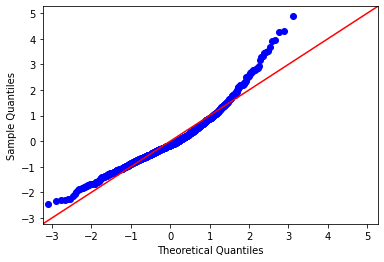

In [73]:
residuals = y_train - lin_reg.predict(X_train)
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

# Check homoscedasticity assumption

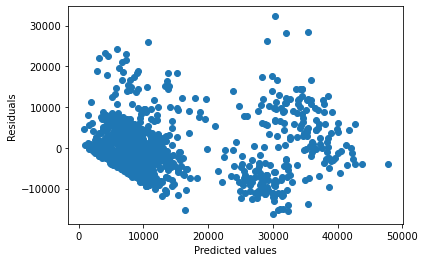

In [74]:
plt.scatter(lin_reg.predict(X_train), residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

# Check independence assumption

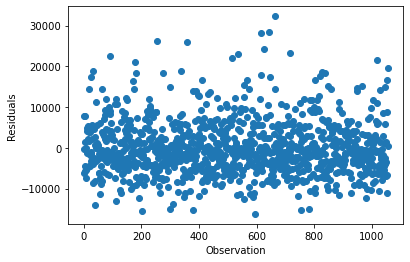

In [75]:
plt.scatter(range(len(residuals)), residuals)
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.show()

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


y_train_pred = lin_reg.predict(X_train)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)


y_test_pred = lin_reg.predict(X_test)


mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Mean Absolute Error (Training): ", mae_train)
print("Mean Squared Error (Training): ", mse_train)
print("Mean Absolute Error (Testing): ", mae_test)
print("Mean Squared Error (Testing): ", mse_test)


Mean Absolute Error (Training):  4935.098314788081
Mean Squared Error (Training):  43353416.36123598
Mean Absolute Error (Testing):  4941.319748714538
Mean Squared Error (Testing):  43363792.54561998


The model appears to perform similarly on the training and testing sets, with the MAE and MSE being very close for both sets.

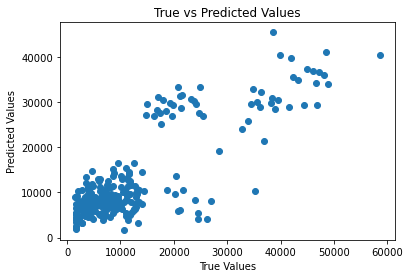

In [77]:
import matplotlib.pyplot as plt

# Make predictions on the testing data
y_test_pred = lin_reg.predict(X_test)

# Plot the predicted values against the true values
plt.scatter(y_test, y_test_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_test_pred = dt_reg.predict(X_test)
dt_mse = mean_squared_error(y_test, y_test_pred)
dt_r2 = r2_score(y_test, y_test_pred)
print("Decision Tree Model")
print("Mean Squared Error (Testing): ", dt_mse)
print("R2 Score (Testing): ", dt_r2)


Decision Tree Model
Mean Squared Error (Testing):  52120131.63737358
R2 Score (Testing):  0.6264434375753589


In [80]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Mean Squared Error (Testing): ", mean_squared_error(y_test, y_pred))
print("R2 Score (Testing): ", r2_score(y_test, y_pred))


Mean Squared Error (Testing):  28714589.839396127
R2 Score (Testing):  0.7941961554036691


In [81]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [82]:
# Create an instance of the Random Forest model
rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Random Forest model")
print("Mean Squared Error (Testing): ", mse)
r2 = r2_score(y_test, y_pred)
print("R2 Score (Testing): ", r2)


Random Forest model
Mean Squared Error (Testing):  29058641.690965433
R2 Score (Testing):  0.791730259349103


In [83]:
# Create an instance of the Gradient Boosting model
gb_reg = GradientBoostingRegressor()

gb_reg.fit(X_train, y_train)

y_pred = gb_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Gradient Boosting model")
print("Mean Squared Error (Testing): ", mse)

r2 = r2_score(y_test, y_pred)
print("R2 Score (Testing): ", r2)

Gradient Boosting model
Mean Squared Error (Testing):  27202868.50378127
R2 Score (Testing):  0.8050309980591955


In [84]:
# Create an instance of the XGBoost model
xgb_reg = XGBRegressor()


xgb_reg.fit(X_train, y_train)


y_pred = xgb_reg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("XGBoost model")
print("Mean Squared Error (Testing): ", mse)


r2 = r2_score(y_test, y_pred)
print("R2 Score (Testing): ", r2)

XGBoost model
Mean Squared Error (Testing):  32288349.364653483
R2 Score (Testing):  0.7685822269417123


In [85]:
# Create an instance of the LightGBM model
lgbm_reg = LGBMRegressor()


lgbm_reg.fit(X_train, y_train)


y_pred = lgbm_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("LightGBM model")
print("Mean Squared Error (Testing): ", mse)


r2 = r2_score(y_test, y_pred)
print("R2 Score (Testing): ", r2)


LightGBM model
Mean Squared Error (Testing):  29033057.460409064
R2 Score (Testing):  0.791913627213279


As we can see from the above evaluation results, the Gradient Boosting model has the lowest Mean Squared Error and the highest R2 Score on the testing data, which means it has the best performance among all the models tried.

Based on the R-squared and mean squared error values reported for the Gradient Boosting model, it appears to be performing well and generalizing well to the testing data. The R-squared value of 0.805 indicates that the model is explaining a good amount of the variance in the target variable, and the mean squared error value is relatively low, indicating that the model's predictions are close to the true values

In [86]:
preprocessed_df

,age,bmi,bloodpressure,children,claim,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
0,0.083195,23.2,91,-0.907376,1121.87,1,1,0,0,1,0
1,-1.270835,30.1,87,-0.907376,1131.51,1,0,0,0,1,0
2,-0.007073,33.3,82,-0.907376,1135.94,1,1,0,0,1,0
3,-0.007073,33.7,80,-0.907376,1136.40,1,0,0,1,0,0
4,-0.007073,34.1,100,-0.907376,1137.01,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1335,0.534539,35.5,88,-0.907376,55135.40,0,1,1,1,0,0
1336,1.888569,38.1,120,-0.077421,58571.07,0,0,1,0,0,0
1337,-0.729223,34.5,91,1.582489,60021.40,1,1,1,1,0,0
1338,-0.097342,30.4,106,-0.907376,62592.87,1,0,1,0,1,0


In [90]:
a=float(input("Enter age:----------"))
b=float(input("Enter bmi:----------"))
c=int(input("Enter bp :----------"))
f=int(input("Enter no. of children:----------"))
l=int(input("Enter gender:----------"))
e=int(input("Enter whether a diabetic:-----------"))
d=int(input("Enter whether a smoker:----------"))
r=int(input("Enter whether region is northwest:----------"))
m=int(input("Enter whether region is southeast:----------"))
n=int(input("Enter whether region is southwest:----------"))

Enter age:----------56
Enter bmi:----------27
Enter bp :----------130
Enter no. of children:----------2
Enter gender:----------1
Enter whether a diabetic:-----------1
Enter whether a smoker:----------1
Enter whether region is northwest:----------1
Enter whether region is southeast:----------0
Enter whether region is southwest:----------0


In [91]:
A=[a,b,c,f,l,e,d,r,m,n]

In [92]:
ANS=lin_reg.predict([A])
ANS

C:\Users\91882\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([40863.80211795])

In [93]:
a=float(input("Enter age:----------"))
b=float(input("Enter bmi:----------"))
c=int(input("Enter bp :----------"))
f=int(input("Enter no. of children:----------"))
l=int(input("Enter gender:----------"))
e=int(input("Enter whether a diabetic:-----------"))
d=int(input("Enter whether a smoker:----------"))
r=int(input("Enter whether region is northwest:----------"))
m=int(input("Enter whether region is southeast:----------"))
n=int(input("Enter whether region is southwest:----------"))

Enter age:----------67
Enter bmi:----------34
Enter bp :----------140
Enter no. of children:----------2
Enter gender:----------0
Enter whether a diabetic:-----------1
Enter whether a smoker:----------0
Enter whether region is northwest:----------0
Enter whether region is southeast:----------1
Enter whether region is southwest:----------0


In [94]:
B=[a,b,c,f,l,e,d,r,m,n]

In [95]:
ANS= rf_reg.predict([B])
ANS

C:\Users\91882\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([27289.2282])